# Truss Analyer Testing Zone

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
import re
import math
import pandas as pd
from PyNite import FEModel3D
from PyNite.Visualization import render_model
from rich import print
import matplotlib.pyplot as plt
# import truss_input as ti
import truss_model as tm

In [19]:
truss_type = "Warren"
n = 8
L = 15000
d = 1100
f_load = 8

top_nodes = []
bot_nodes = []

if truss_type == "Warren":
    n_nodes_b = n/2
    n_nodes_t = n_nodes_b + 1
    dist_w_b = L/(n/2) #distance between bottom nodes
    for i, loc in enumerate(list(np.linspace(0, L, int(n_nodes_t)))):
        t_node = [loc, d]
        top_nodes.append(t_node)
        if i == 0:
            continue
        else: 
            b_node = [loc-dist_w_b/2, 0] 
            bot_nodes.append(b_node)

elif truss_type == "Modified Warren":
    n_nodes_b = n/3
    n_nodes_t = 2*n_nodes_b + 1
    for i, loc in enumerate(list(np.linspace(0, L, int(n_nodes_t)))):
        t_node = [loc, d]
        top_nodes.append(t_node)
        if (i % 2 != 0): #add a bottom node for every even top node
            b_node = [loc, 0] 
            bot_nodes.append(b_node)

else:
    n_nodes_b = (n-1)/2
    n_nodes_t = n_nodes_b + 2
    for i, loc in enumerate(list(np.linspace(0, L, int(n_nodes_t)))):
        t_node = [loc, d]
        top_nodes.append(t_node)
        if (i == 0) or (i == n_nodes_t-1):
            continue
        else: 
            b_node = [loc, 0] 
            bot_nodes.append(b_node)


+----------------+
| Statics Check: |
+----------------+

+------------------+--------+-----------+----------+---------+--------+--------+--------+---------+--------+---------+--------+---------+
| Load Combination | Sum FX |   Sum RX  |  Sum FY  |  Sum RY | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY | Sum MZ | Sum RMZ |
+------------------+--------+-----------+----------+---------+--------+--------+--------+---------+--------+---------+--------+---------+
|        LC        |   0    | -4.37e-11 | -1.2e+05 | 1.2e+05 |   0    |   0    |   0    |    0    |   0    |    0    | -9e+08 |  9e+08  |
+------------------+--------+-----------+----------+---------+--------+--------+--------+---------+--------+---------+--------+---------+



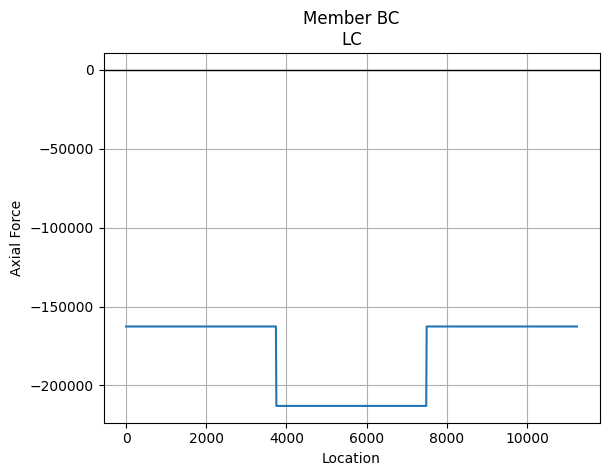

In [33]:
truss = tm.truss_model(top_nodes, bot_nodes, truss_type, f_load)
# render_model(truss, combo_name="LC", annotation_size=50, labels = False )
# render_model(truss, combo_name="LC", annotation_size=200)
truss.analyze(check_statics=True)
truss.Members['BC'].plot_axial(combo_name="LC", n_points=1000)

In [7]:
# # Import and clean Canam's tables

# def remove_comma(cell):
#     number = float(cell.replace(',', ''))
#     return number

# canam_df = pd.read_csv('OWSJ_tables_canam.csv',header=1)
# canam_df.rename(columns={canam_df.columns[0]: 'span', canam_df.columns[1]: 'depth'}, inplace=True)
# canam_df['span'].ffill(inplace=True)
# canam_df['span']= canam_df['span']*1000
# canam_df['depth'] = canam_df['depth'].apply(remove_comma)
# canam_df['depth'] = canam_df['depth'].astype(float)
# canam_df.head(10)

# # save as json for linux reading
# # canam_df.to_json('canam_df.json', orient='records')

In [8]:
# # Import Vulcraft's data
# vulcraft_df = pd.read_csv('OWSJ_tables_vulcraft.csv', header=1)
# vulcraft_df.rename(columns={"Factored Load": 'value'}, inplace=True)
# vulcraft_df.columns = [col.lower() for col in vulcraft_df]
# #drop first row and all bridging rows
# vulcraft_df.drop(index=0, inplace=True)
# vulcraft_df = vulcraft_df[~vulcraft_df['value'].str.contains('Bridg.')]
# #fill depths
# vulcraft_df['depth'].bfill(inplace=True)
# #convert all span values to mm
# vulcraft_df.span = vulcraft_df.span.astype(float)
# vulcraft_df.span = vulcraft_df.span*1000
# vulcraft_df.head(30)

# # save as json for linux reading
# # vulcraft_df.to_json('vulcraft_df.json', orient='records')

In [9]:
# # Import Omega's tables

# def find_span(cell):
#     if "SPAN" in cell:
#         match_span = re.search(r'\b(\d+)\b', cell)
#         return match_span.group(1)
#     else:
#         return np.nan

# omega_df = pd.read_csv('OWSJ_tables_omega.csv', header=None)
# col_names = ["depth", "D/D", "E/D", "E/E", "F/E", "F/F", "G/F", "G/G", "H/G", "H/H", "K/H", "K/K", "L/K", "L/L"]
# omega_df.columns = col_names
# omega_df['span'] = omega_df['depth'].apply(find_span)
# omega_df['span'].ffill(inplace=True)
# columns = ['span'] + [col for col in omega_df if col != 'span']
# omega_df = omega_df[columns]
# # Drop rows with useless info; cells with "DEPTH" OR "SPAN"
# omega_df = omega_df[~omega_df['depth'].str.contains('DEPTH') & ~omega_df['depth'].str.contains('SPAN')]

# # save as json for linux reading
# # omega_df.to_json('omega_df.json', orient='records')

In [10]:
# import tabula
# tables = tabula.read_pdf("metric tables from Vulcraft OWSJ.pdf", pages='all', multiple_tables=True, pandas_options={'header': None})

In [131]:
# # Start working with the saved dataframes for testing
# canam_df = pd.read_json("canam_df.json")
# omega_df = pd.read_json("omega_df.json")
# vulcraft_df = pd.read_json("vulcraft_df.json")
# canam_df.name = "canam"
# omega_df.name = "omega"
# vulcraft_df.name = "vulcraft"

# OWSJ_dfs = [canam_df, omega_df, vulcraft_df]

# span = 6000
# depth = 500
# f_load = 8

In [132]:
# #Run through each dataframe of tables and pull out the expected weight kg/m of joist used
# def find_adjacent_numbers(numbers, target):
#     """
#     Find numbers adjacent to target number for the sake of running interpolation
#     """
#     sorted_numbers = np.sort(numbers) # Sort the list of numbers
#     index = np.searchsorted(sorted_numbers, target) # Find the index of the target number
#     # Get the two numbers adjacent to the target number
#     if index == 0:
#         return sorted_numbers[0], sorted_numbers[0]
#     elif index == len(sorted_numbers):
#         return sorted_numbers[-1], sorted_numbers[-1]
#     else:
#         return sorted_numbers[index - 1], sorted_numbers[index]
        
# def isolate_sw(cell):
#     sw = float(cell.split("\n")[0])
#     return sw


# for df in OWSJ_dfs:
#     name = df.name
#     print(name)
#     span_mask = (df['span'] < 1.05*span) & (df['span'] > 0.95*span) 
#     depth_mask = (df['depth'] < 1.05*depth) & (df['depth'] > 0.95*depth)
#     df = df.loc[span_mask & depth_mask]
#     #Omega
#     if name == "omega":
#         cols = [col for col in df.columns if '/' in col]
#         df_sliced = df[cols]
#         chords = []
#         sws = []
#         for column in df_sliced.columns:
#             for index, cell_value in enumerate(df_sliced[column]):
#                 try:
#                     f = float(cell_value.split("\n")[0])
#                     sw = float(cell_value.split("\n")[2])
#                     if (f > 0.97*f_load) & (f < 1.03*f_load):
#                         chords.append((column, sw))
#                         sws.append(sw)
#                 except:
#                     continue
#         if sws == []:
#             expected_sw_omega = "no values found in that range"
#         else:
#             expected_sw_omega = np.mean(sws)
#     #Vulcraft         
#     elif name == "vulcraft":
#         df = df[df['value'].str.contains('Self')] #drop L/360 row
#         col_nums = [float(col) for col in df.columns if "." in col] #convert factored headers to float
#         adjacent_f_loads = find_adjacent_numbers(col_nums, f_load) #find interpolated, likely average self weight
#         df = df[[str(min(adjacent_f_loads)), str(max(adjacent_f_loads))]]
#         if adjacent_f_loads[1] == adjacent_f_loads[0]:
#             expected_sw_vulcraft = df[str(adjacent_f_loads[0])].values.mean()
#         else:
#             ratio = (f_load - min(adjacent_f_loads))/(abs(adjacent_f_loads[1] - adjacent_f_loads[0]))
#             df[str(f_load)] = (df[str(max(adjacent_f_loads))] - df[str(min(adjacent_f_loads))])*ratio + df[str(min(adjacent_f_loads))]
#             expected_sw_vulcraft = df[str(f_load)].values.mean()
#     #Canam
#     elif name == "canam":
#         col_nums = [float(col) for col in df.columns if "." in col] #convert factored headers to float
#         adjacent_f_loads = find_adjacent_numbers(col_nums, f_load) #find interpolated, likely average self weight
#         df = df[[str(min(adjacent_f_loads)), str(max(adjacent_f_loads))]]
#         df = df.map(isolate_sw)
#         if adjacent_f_loads[1] == adjacent_f_loads[0]:
#             expected_sw_canam = df[str(adjacent_f_loads[0])].values.mean()
#         else:
#             ratio = (f_load - min(adjacent_f_loads))/(abs(adjacent_f_loads[1] - adjacent_f_loads[0]))
#             df[str(f_load)] = (df[str(max(adjacent_f_loads))] - df[str(min(adjacent_f_loads))])*ratio + df[str(min(adjacent_f_loads))]
#             expected_sw_canam = df[str(f_load)].values.mean()

canam

omega

vulcraft